# Aprendizaje Estadístico y Data Mining

## Práctica 3: Principal Component Analysis

### Objetivo
Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias dimensiones para ello. Para evitar esto, existe una metodología la cual, un set de datos multidimensional, podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de datos que está colgado en Canvas y vamos a dar una serie de explicaciones de que ocurre.

* [Link al dataset.](./data/Pokemon.csv)

**Instalación de las librerías necesarias**


In [ ]:

#%pip install -q -r requirements.txt

### Apartado 1

**Enunciado:** Estandarizar los datos utilizando el método *StandardScaler* de la librería scikit-learn para asegurar que las diferencias de rango entre las variables no afecten al procesamiento y análisis de la información. Aplicar esta transformación a las variables relevantes antes de realizar cualquier modelado o visualización.

**Solución:** 

El dataset de Pokemon contiene 21 filas y 8 columnas. Las columnas son: *Pokemon*, *Tipo*, *PS*, *Ataque*, *Defensa*, *Ataque especial*, *Defensa especial* y *Velocidad*. Si analizamos las variables numéricas del dataset, podemos ver que las variables *PS*, *Ataque*, *Defensa*, *Ataque especial*, *Defensa especial* y *Velocidad* tienen un rango de valores diferente. Por ejemplo, la variable *PS* tiene un rango de valores entre 1 y 4, mientras que la variable *Velocidad* tiene un rango de valores entre 1 y 5.

En este ejercicio vamos a estandarizar las variables numéricas del dataset de Pokemon. Estandarizar significa que vamos a transformar las variables para que tengan una **media de 0** y una **desviación estándar de 1** usando la función [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). Esto es útil para que las variables tengan el mismo peso en el análisis y evitar que una variable con un rango muy grande tenga más peso que otra con un rango más pequeño.

La fórmula de la estandarización que sigue la función *StandardScaler* es la siguiente:
$$ Z = \frac{x - \mu}{\sigma} $$

Donde:
* $Z$ es el valor estandarizado.
* $x$ es el valor original.
* $\mu$ es la media de la variable.
* $\sigma$ es la desviación estándar de la variable.

In [59]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from adjustText import adjust_text
from sklearn.preprocessing import StandardScaler

CSV_FILE_PATH = "data/Pokemon.csv"


def cargar_datos() -> pd.DataFrame:
    """Carga los datos del archivo CSV_FILE_PATH

    Returns:
        pd.DataFrame: DataFrame con los datos del archivo CSV_FILE_PATH
    """
    df = pd.read_csv(CSV_FILE_PATH, sep=",")
    return df


def estandarizar_datos(df: pd.DataFrame) -> pd.DataFrame:
    """Estandariza las columnas numéricas de un DataFrame

    Args:
        df (pd.DataFrame): DataFrame con los datos

    Returns:
        pd.DataFrame: DataFrame con las columnas numéricas estandarizadas
    """
    # Seleccionamos las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns
    df_columnas_numericas = df[columnas_numericas]

    # Estandarizamos las columnas numéricas
    scaler = StandardScaler()
    col_num_estadard = scaler.fit_transform(df_columnas_numericas)

    return pd.DataFrame(col_num_estadard, columns=columnas_numericas)


df = cargar_datos()
datos_estandarizados = estandarizar_datos(df)

# Mostramos las estadísticas de los datos estandarizados
print("\nEstadísticas de los datos estandarizados:")
print(datos_estandarizados.describe().round(2))

# Verificamos que la media y la desviación estándar de los datos estandarizados
print("\nMedia de cada variable:")
print(datos_estandarizados.mean().round(4))
print("\nDesviación estándar de cada variable:")
print(datos_estandarizados.std().round(4))


Estadísticas de los datos estandarizados:
          PS  Ataque  Defensa  Ataque especial  Defensa especial  Velocidad
count  20.00   20.00    20.00            20.00             20.00      20.00
mean    0.00   -0.00    -0.00            -0.00              0.00      -0.00
std     1.03    1.03     1.03             1.03              1.03       1.03
min    -1.63   -2.12    -2.00            -1.17             -1.75      -1.67
25%    -0.33   -1.03    -0.75            -1.17             -0.50      -0.77
50%    -0.33    0.05    -0.13             0.13             -0.50       0.14
75%     0.98    0.33     0.50             0.56              0.75       1.04
max     2.28    2.23     1.75             1.43              2.00       1.94

Media de cada variable:
PS                  0.0
Ataque             -0.0
Defensa            -0.0
Ataque especial    -0.0
Defensa especial    0.0
Velocidad          -0.0
dtype: float64

Desviación estándar de cada variable:
PS                  1.026
Ataque              1.02

**Resultados:**
* **Media y desviación estándar**:
  * Tras estandarizar las variables numéricas, la media de cada variable es cero o muy cercana a cero (Valores entre $-0.0$ y $0.0$). Esto nos confirma que hemos estandarizado correctamente las variables.
  
  * La desviación estándar de cada variable es $1.026$ en vez de exactamente $1$. Esto se debe a que la función *StandardScaler* no redondea los valores de la desviación estándar. Sin embargo, la desviación estándar es muy cercana a $1$, lo que nos indica que hemos estandarizado correctamente las variables.

* **Valores Estandarizados**:
  * *Mínimos y máximos*:
    * El valor mínimo más extremo es de $-2.12$ en Ataque, lo que significa que hay un Polémon con una estadística de ataque significativamente menor que la media.
    
    * El valor máximo más alto es $2.28$ en PS, lo que indica que hay un Poémon con un PS significativamente mayor que la media.
  
  * *Distribución cuartílica*:
    * El 25% de los Pokémons tienen valores estandarizados menores a aproximadamente $-1.0$ en ataque y $-0.75$ en defensa, lo que nos indica que hay Pokémons con valores relativamente bajos en estas categorías.
    
    * El 50% (la mediana) en la mayoría de las categorías/variables está cerca de $0$, lo que indica que hay un balance entre Pokémons con valores por encima y por debajo de la media.

    * El 75% de los Pokémons tienen valores por debajo de $1.0$ en la mayoría de las estadísticas.

### Apartado 2

**Enunciado:** Calcular la matriz de covarianza de los datos estandarizados utilizando el método cov de *numpy* y obtener sus autovalores (*eigenvalues*) y autovectores (*eigenvectors*) aplicando el método linalg.eig. A partir de estos valores, construir un DataFrame que muestre el porcentaje de varianza explicada por cada componente y su acumulado. Interpretar estos resultados para determinar cuántos componentes principales son necesarios para representar los datos iniciales de manera efectiva, analizando la importancia de cada componente en la variabilidad total del conjunto de datos.

El análisis de componentes transforma las variables originales en nuevas variables (componentes principales), que son combinaciones lineales de las variables originales y están ordenadas según la cantidad de varianza que explican los datos. Cada componente principal tiene:
* Un **autovalor**, que representa cuárianza de los datos orginales representa el componente.
* Varios **autovectores**, que representan la dirección de la varianza de los datos originales.
* Un **porcentaje de varianza explicada**, que indica que porcentaje dela información total del dataset es capturado por el componente.
* Un **porcentaje acumulado de varianza explicada**, que indica el porcentaje de información total capturado por los componentes anteriores (Suma progresiva de la varianza explicada). Ayuda a determinar cuántos componentes son necesarios para representar los datos de manera efectiva.

**Solución**

In [18]:
def calcular_componentes_principales(datos_estandarizados: pd.DataFrame) -> pd.DataFrame:
    """Calcula el autovalor, la varianza explicada y la varianza acumulada de los componentes principales

    Args:
        datos_estandarizados (pd.DataFrame): DataFrame con los datos estandarizados a analizar

    Returns:
        pd.DataFrame: DataFrame con los resultados del análisis de componentes principales
    """

    # 1. Caculamos la matriz de covarianza utilizando la
    # matriz transpuesta de los datos estandarizados
    matriz_covarianza = np.cov(datos_estandarizados.T)

    # 2. Calculamos los autovalores y autovectores de la matriz de covarianza
    autovalores, autovectores = np.linalg.eig(matriz_covarianza)

    # 3. Ordenamos por importancia. Para ello, obtenemos los
    # índices que ordenarían los autovalores de mayor a menor
    indice = autovalores.argsort()[::-1]

    # 4. Ordenamos los autovalores y autovectores según los índices
    # que calculamos en el paso anterior
    autovalores_ordenados = autovalores[indice]
    autovectores_ordenados = autovectores[:, indice]

    # 5. Calculamos la varianza explicada y acumulada
    varianza_total = np.sum(autovalores_ordenados)
    varianza_explicada = autovalores_ordenados / varianza_total
    varianza_acumulada = np.cumsum(varianza_explicada)

    # 6. Crear DataFrame con resultados
    componentes = range(1, len(autovalores_ordenados) + 1)
    df_varianza = pd.DataFrame({
        'Componente': componentes,
        'Autovalor': autovalores_ordenados,
        'Varianza_Explicada_%': varianza_explicada * 100,
        'Varianza_Acumulada_%': varianza_acumulada * 100
    })

    return df_varianza.round(4)


resultado = calcular_componentes_principales(datos_estandarizados)
print("\nAnálisis de Componentes Principales:")
print(resultado)


Análisis de Componentes Principales:
   Componente  Autovalor  Varianza_Explicada_%  Varianza_Acumulada_%
0           1     2.6300               41.6413               41.6413
1           2     1.5507               24.5521               66.1935
2           3     0.7808               12.3630               78.5565
3           4     0.7155               11.3291               89.8856
4           5     0.4746                7.5145               97.4001
5           6     0.1642                2.5999              100.0000


**Resultados:**
* El **primer** componente explica el **$41.6413\%$** de la varianza total:
  * Este es el componente más importante y el que contiene la mayor cantidad de información de los datos originales.
  * Los Pokémons pueden diferenciarse fuertemente según este eje.

* El **segundo** componente explica un **$24.5521\%$**:
  * Al sumar el primer y el segundo componente, se representa el **$66.1934\%$** de la varianza total, lo que significa que en solo dos dimensiones ya capturamos la mayor parte de la información original.
  
* Con los **tres primeros** compontes, representamos un **$78.5565\%$** de la varianza total:
  * Si representamos los datos en un espacio tridimensional usando PC1, PC2 y PC3, conservamos casi el **$80\%$** de la información original.

* Para representar más del **$95\%$** de la información original, necesitaríamos al menos **cinco componentes**:
  * El cuarto componente añade un $11.3291\%$ y el quinto un $7.5145\%$, lo que sumaria la varianza explicada al $97.4\%$.
  * El sexto componente añade un $2.5999\%$ adicional, por lo que apenas aporta información nueva.

Ya que el dataset es bastante pequeño, podemos representar la mayoría de la información original en solo dos dimensiones utilizando los dos primeros componentes principales. Además, si utilizamos tres componentes, podemos representar casi el $80\%$ de la información original, lo que nos daría un buen equilibrio entre simplificación y representación de la información.

### Apartado 3

**Enunciado:** Representar gráficamente los individuos del dataset utilizando los valores de los componentes principales obtenidos. Para ello, reducir la dimensionalidad a dos componentes principales y generar un diagrama de dispersión en 2D. Analizar la distribución de los datos en este nuevo espacio reducido, identificando posibles agrupaciones, patrones o tendencias que permitan extraer conclusiones sobre la estructura de los datos originales.

* Referencias:
  * [Marcadores de puntos en Matplotlib.](https://matplotlib.org/stable/api/markers_api.html)
  * [Colores en Matplotlib.](https://matplotlib.org/stable/gallery/color/named_colors.html)
  * [Ajuste del texto.](https://adjusttext.readthedocs.io/en/latest/Examples-for-multiple-subplots.html)

**Solución**

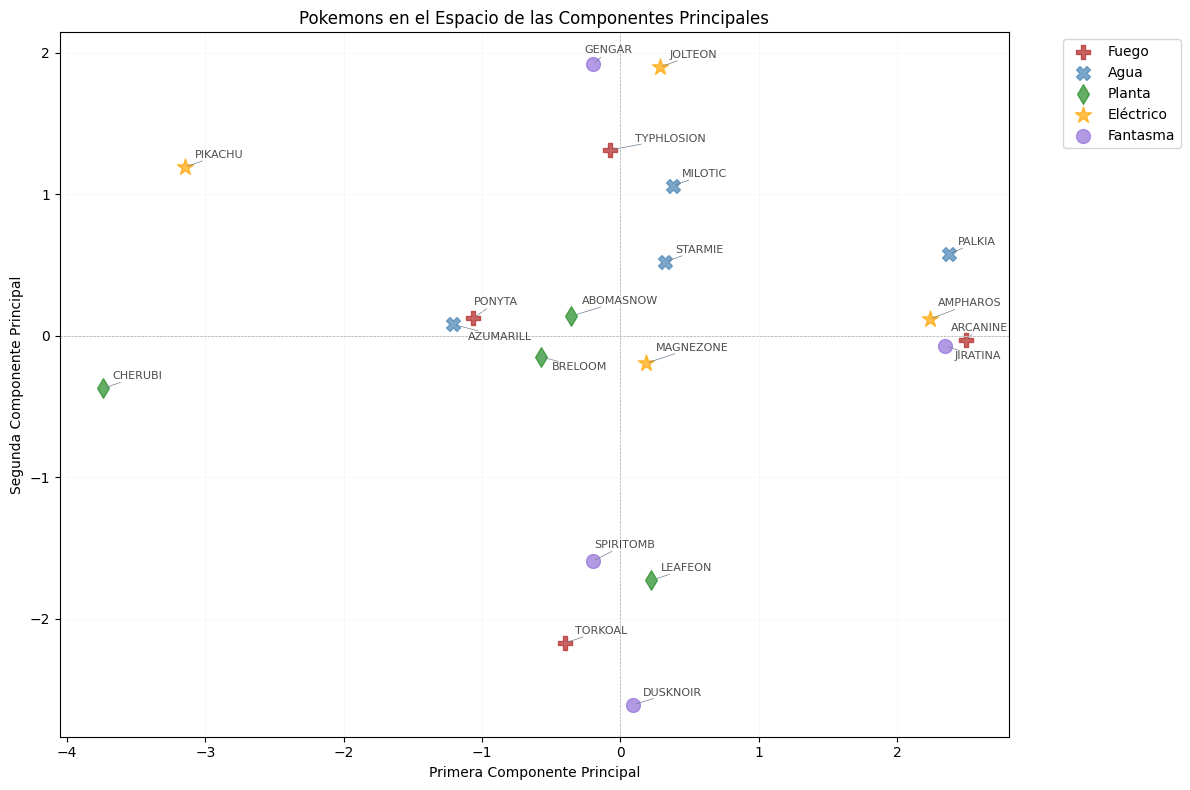

In [90]:
def visualizar_pca(datos_originales: pd.DataFrame, datos_estandarizados: pd.DataFrame) -> tuple:
    """Visualiza los datos en el espacio de las dos primeras componentes principales

    Args:
        datos_originales (pd.DataFrame): DataFrame con los datos originales a visualizar
        datos_estandarizados (pd.DataFrame): DataFrame con los datos estandarizados

    Returns:
        tuple: Tupla con un DataFrame con los datos proyectados y la figura generada
    """
    matriz_covarianza = np.cov(datos_estandarizados.T)

    autovalores, autovectores = np.linalg.eig(matriz_covarianza)

    indice = autovalores.argsort()[::-1]
    autovectores_ordenados = autovectores[:, indice]

    # Proyectamos los datos en el espacio de las dos primeras componentes principales
    datos_espacio_2_dimensiones = np.dot(datos_estandarizados, autovectores_ordenados[:, :2])

    # Creamos un DataFrame con los datos proyectados
    df_datos_espacio_2_dimensiones = pd.DataFrame(
        data=datos_espacio_2_dimensiones,
        columns=['Componente Principal 1', 'Componente Principal 2']
    )

    df_datos_espacio_2_dimensiones['Tipo'] = datos_originales['Tipo']
    df_datos_espacio_2_dimensiones['Pokemon'] = datos_originales['Pokémon']

    # Estilos para los puntos segun el tipo
    estilos = {
        'Fuego': {'color': 'firebrick', 'marker': 'P', 'size': 100},
        'Agua': {'color': 'steelblue', 'marker': 'X', 'size': 100},
        'Planta': {'color': 'forestgreen', 'marker': 'd', 'size': 100},
        'Normal': {'color': 'gray', 'marker': 'o', 'size': 100},
        'Eléctrico': {'color': 'orange', 'marker': '*', 'size': 150},
        'Fantasma': {'color': 'mediumpurple', 'marker': 'o', 'size': 100},
        'default': {'color': 'black', 'marker': 'x', 'size': 100},
    }

    # Creamos una figura para visualizar los datos en el espacio PCA 2D
    plt.figure(figsize=(12, 8))

    nombres_Pokemons = []
    for tipo in datos_originales['Tipo'].unique():
        mascara = df_datos_espacio_2_dimensiones['Tipo'] == tipo
        estilo = estilos.get(tipo, estilos['default'])

        plt.scatter(
            df_datos_espacio_2_dimensiones[mascara]['Componente Principal 1'], # Coordenada X
            df_datos_espacio_2_dimensiones[mascara]['Componente Principal 2'], # Coordenada Y
            c = estilo['color'],                                                 # Color
            marker = estilo['marker'],                                           # Marcador
            s = estilo['size'],                                                  # Tamaño
            label = tipo,                                                        # Etiqueta
            alpha = 0.7                                                          # Transparencia
        )

        # Collect text annotations
        for indice, fila in df_datos_espacio_2_dimensiones[mascara].iterrows():
            nombres_Pokemons.append(plt.text(
                fila['Componente Principal 1'], # Coordenada X
                fila['Componente Principal 2'], # Coordenada Y
                fila['Pokemon'],                # Texto
                fontsize = 8,                   # Tamaño de fuente
                alpha = 0.7                     # Transparencia
            ))

    # Adjust text positions to avoid overlaps
    adjust_text(
        nombres_Pokemons,
        arrowprops=dict(arrowstyle='-', color='slategray', lw=0.5),
        expand=(1.7, 2)
    )

    plt.title('Pokemons en el Espacio de las Componentes Principales')      # Título
    plt.xlabel('Primera Componente Principal')                              # Etiqueta eje X
    plt.ylabel('Segunda Componente Principal')                              # Etiqueta eje Y
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')                  # Leyenda
    plt.tight_layout()                                                      # Ajustar diseño
    plt.grid(True, color='whitesmoke', linestyle='-', linewidth=0.5)         # Cuadrícula
    plt.gca().axhline(y=0, color='darkgrey', linestyle='--', linewidth=0.5) # Línea eje X
    plt.gca().axvline(x=0, color='darkgrey', linestyle='--', linewidth=0.5) # Línea eje Y


    return df_datos_espacio_2_dimensiones, plt.gcf()

# Uso
df_datos_espacio_2_dimensiones, fig = visualizar_pca(df, datos_estandarizados)
plt.show()

**Resultados:**

La representación en el espacio de los dos primeros componentes principales nos permite visualizar la distribución de los Pokémons en un espacio bidimensional. Algunas observaciones interesantes son:

* **Agrupaciones claras por tipo y similitud de atributos**:
  * Los Pokémons de tipo *Agua* (Azumarill, Milotic, Starmie, Palkia) parecen formar una tendencia en la parte derecha del gráfico.
  
  * Los Pokémons de tipo *Planta* (Breloom, Abomasnow, Cherubi, Laefeon) están más dispersos, pero algunos se agrupan en la parte inferior-izquierda.
  
  * Los Pokémons de tipo *Fantasma* (Gengar, Spiritomb, Jiratina, Dusknoir) están bien diferenciados, situándose en posiciones alejadas del resto.
  
  * Los Pokémons de tipo *Eléctrico* (Jolteon, Magnezone, Ampharos, Pikachu) se distribuyen en diferentes zonas, pero algunos están cerca, lo que nos indica ciertas similitudes.

* **Separación de los Pokemons nos indica diferencias en las estadísticas**:
  * Pokémons como Palkia y Arcanine tienen valores altos en el primer componente, lo que nos sugiere que sus estadísticas generales son superiores a las métricas más influyentes en este componente.
  
  * Cherubi es un outlier en la parte inferior izquierda, lo que nos indica que es un Pokémon con características muy distintas respecto a los demás (Cuenta con stats muy bajas en comparación con el resto).
  
  * Jolteon y Gengar están en la parte superior  derecha, lo que puede significar que su combinación de Velocidad y Ataque Especial es dominante en el primer y segundo componente.

  * Typhlosion tiene un valor muy alto en el segundo componente, esto podría significar que la Velocidad y Ataque Especial son  estadísticas influyentes en el segundo componente.

  * Los Pokémons de tipo *Agua* y *Planta* muestran cierta agrupación, lo que podría indicarnos similitudes en sus estadísticas.
  
  * Los Pokémons de tipo *Fantasma* y *Eléctrico* están muy dispersos, lo que nos sugiere que sus estadísticas son muy variadas y no siguen un patrón claro.

* **El primer componente y el segundo parecen representar características ofensivas vs. defensivas**:
  * El primer componente parece estar relacionado con estadísticas generales de poder como *PS*, *Ataque* y *Defensa*, ya que los Pokémons más fuertes se encuentran en valores altos de este componente.
  
  * El segundo componente podría estar representando estadísticas ofensivas como *Ataque especial* y *Velocidad*, lo que explicaría por qué Pokémons como Jolteon y Gengar están en la parte superior derecha.